## Entrenamiento del proyecto IA

In [1]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage import transform
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
#  Dense permite utilizar las ultmas capas que son nodos o neuronas en un capa
# Flatten permite cambiar una matriz a un vector, que pueda ser enetendida por las demas neuronas conectadas 
from keras.optimizers import SGD # descenso del gradiente 
from keras.layers.convolutional import Convolution2D, MaxPooling2D

C:\Users\Felipe\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


## Función para la lectura de los datos

In [2]:
def lectura_imagenes(directorio):
    # Vector de direcotorios, existente en la ruta indicada
    dirs = [ d for d in os.listdir(directorio) ]   
    # Lista que va guardar las imagenes leidas
    images = []
    etiquetas = []
    i = 0
    for directory in dirs:
        nom_carpeta = os.path.join(directorio,directory)
        # Listado de nombres de imagenes, en una sola ruta 
        list_nombre_images = [ os.path.join(nom_carpeta,f) 
                               for f in os.listdir(nom_carpeta)
                               if f.endswith(".jpg")]
        # leyendo las imagenes 
        for f in list_nombre_images:
            images.append(io.imread(f))
            etiquetas.append(i)
        i += 1
    
    return images,etiquetas

In [3]:
# Directorios 
images_entrenamiento,etiquetas = lectura_imagenes("images/entrenamiento")
#images_validacion = lectura_imagenes("images/validacion")

In [4]:
# Convirtiendo lista de imagenes a un array
images_entrenamiento = np.array(images_entrenamiento)
etiquetas = np.array(etiquetas)
#images_validacion = np.array(images_validacion)

In [5]:
images_entrenamiento.shape

(564,)

In [5]:
nclases = 7
etiquetas = np_utils.to_categorical(etiquetas,nclases)
#y_test = np_utils.to_categorical(y_test, nclases)

In [6]:
etiquetas.shape

(573, 7)

In [7]:
# Redimensionando las imágenes a 32x32
images_entrenamiento = [ transform.resize(image,(50,50)) for image in images_entrenamiento]
#images_validacion = [ transform.resize(image,(32,32)) for image in images_validacion]

C:\Users\Felipe\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Felipe\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
images_entrenamiento = np.array(images_entrenamiento)
images_entrenamiento.shape

(573, 50, 50, 3)

## Listado de Variables

In [9]:
tam_lote = 15
iteraciones = 1
filtro = 3
num_colores = 3
ancho = 30
altura = 30

## Modelo de la red Neuronal Convolucional


In [10]:
modelo = Sequential()

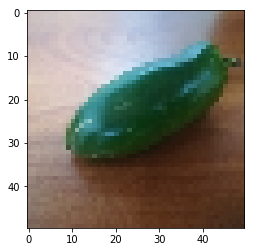

In [10]:
plt.imshow(images_entrenamiento[40])
plt.show()

In [11]:
# Primera red convolucional
modelo.add(Convolution2D(64,kernel_size=(6,6), strides=(1,1), activation='relu',
                         input_shape=(50, 50, 3)))

modelo.add(MaxPooling2D(pool_size=(2,2), strides=2))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
modelo.add(Convolution2D(100,kernel_size=(6,6), strides=(1,1), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [13]:
# Segunda red convolucional
modelo.add(Convolution2D(50, kernel_size=(6,6), strides=(1,1), activation='relu'))
modelo.add(MaxPooling2D( pool_size=(2,2), strides=2))

In [14]:
altura

30

In [14]:
# Aplanamiento de las redes convolucionales, pasandolos a vectores
modelo.add(Flatten())
# NN con 50 neuronas 
modelo.add(Dense(128, activation='relu'))

modelo.add(Dense(64, activation='relu'))
# Softmax con 10 neuronas de salida 
modelo.add(Dense(nclases, activation='softmax'))

# Optimizador,  con gradiente descendiente 
omptimizador = SGD(lr=0.001)
modelo.compile(loss='categorical_crossentropy',
               optimizer=omptimizador,
               metrics=['accuracy'])

In [15]:
# Entrenamiento 
modelo.fit(images_entrenamiento, etiquetas, epochs=180, batch_size=5,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/180
 - 8s - loss: 1.9410 - acc: 0.1745
Epoch 2/180
 - 6s - loss: 1.9360 - acc: 0.1710
Epoch 3/180
 - 6s - loss: 1.9312 - acc: 0.2112
Epoch 4/180
 - 6s - loss: 1.9261 - acc: 0.2094
Epoch 5/180
 - 6s - loss: 1.9214 - acc: 0.2531
Epoch 6/180
 - 6s - loss: 1.9156 - acc: 0.2443
Epoch 7/180
 - 6s - loss: 1.9086 - acc: 0.2513
Epoch 8/180
 - 6s - loss: 1.9008 - acc: 0.2443
Epoch 9/180
 - 6s - loss: 1.8909 - acc: 0.2653
Epoch 10/180
 - 6s - loss: 1.8793 - acc: 0.2373
Epoch 11/180
 - 6s - loss: 1.8637 - acc: 0.2478
Epoch 12/180
 - 6s - loss: 1.8445 - acc: 0.3124
Epoch 13/180
 - 6s - loss: 1.8213 - acc: 0.3211
Epoch 14/180
 - 6s - loss: 1.7917 - acc: 0.3770
Epoch 15/180
 - 6s - loss: 1.7507 - acc: 0.3822
Epoch 16/180
 - 7s - loss: 1.7044 - acc: 0.4119
Epoch 17/180
 - 6s - loss: 1.6524 - acc: 0.3735
Epoch 18/180
 - 7s - loss: 1.5965 - acc: 0.4014
Epoch 19/180
 - 6s - loss: 1.5424 - acc: 0.4520
Epoch 20/180
 - 6s - loss: 1.4884 - acc: 0.4450
E

 - 7s - loss: 0.0179 - acc: 1.0000
Epoch 166/180
 - 7s - loss: 0.0157 - acc: 1.0000
Epoch 167/180
 - 7s - loss: 0.0161 - acc: 1.0000
Epoch 168/180
 - 7s - loss: 0.0162 - acc: 1.0000
Epoch 169/180
 - 7s - loss: 0.0155 - acc: 1.0000
Epoch 170/180
 - 7s - loss: 0.0146 - acc: 1.0000
Epoch 171/180
 - 7s - loss: 0.0157 - acc: 1.0000
Epoch 172/180
 - 7s - loss: 0.0148 - acc: 1.0000
Epoch 173/180
 - 7s - loss: 0.0117 - acc: 1.0000
Epoch 174/180
 - 7s - loss: 0.0111 - acc: 1.0000
Epoch 175/180
 - 7s - loss: 0.0126 - acc: 1.0000
Epoch 176/180
 - 7s - loss: 0.0106 - acc: 1.0000
Epoch 177/180
 - 7s - loss: 0.0113 - acc: 1.0000
Epoch 178/180
 - 7s - loss: 0.0108 - acc: 1.0000
Epoch 179/180
 - 7s - loss: 0.0113 - acc: 1.0000
Epoch 180/180
 - 7s - loss: 0.0105 - acc: 1.0000


In [16]:
target_dir = "./model/"
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

modelo.save('./model/model.h5')
modelo.save_weights('./model/pesos.h5')